# DB 와 자료준비

매번 인터넷으로 받아오면 시간이 너무 오래 걸리기에, csv 파일로 내보내진 파일을 불러와서 DB 에 넣고 바로 시작한다.

In [1]:
import pandas as pd # 데이터프레임워크
from sqlalchemy import create_engine # 데이터베이스 툴킷
#### create table
# http://docs.sqlalchemy.org/en/latest/orm/tutorial.html
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# types 
# http://docs.sqlalchemy.org/en/latest/core/type_basics.html
from sqlalchemy import Column, Integer, String, Float

class CarInfo(Base):
    __tablename__ = 'car_info'

    id = Column(Integer, primary_key=True) 
    year = Column(Integer)
    company = Column(String(16))
    subname = Column(String(16))
    title = Column(String(16))
    mile = Column(Integer)
    vendor = Column(String(16))
    photos = Column(Integer)
    video = Column(Integer)
    exterior_color = Column(String(16))
    interior_color = Column(String(16))
    transmission = Column(String(16))
    drivertrain = Column(String(16))
    star = Column(Float)
    review_no = Column(String(16))
    price = Column(Integer)

    def __repr__(self):
        return rtform % (
                        self.id, self.year, self.company, self.subname, 
                        self.title, self.mile, self.vendor, 
                        self.photos, self.video, self.exterior_color, 
                        self.interior_color, self.transmission, self.drivertrain, 
                        self.star, self.review_no, self.price, )
    
    rtform = "<CarInfo(id = '%s', year = '%s', company = '%s', subname = '%s',title = '%s', mile = '%s', vendor = '%s', photos = '%s', video = '%s', exterior_color = '%s', interior_color = '%s', transmission = '%s', drivertrain = '%s', star = '%s', review_no = '%s', price = '%s)>"

#pw = pickle.load(open('./Data/pw.p','rb'))

# write local car_info
#engine = create_engine("mysql+mysqldb://root:" + pw.data + "@127.0.0.1/car_info", echo=True)
engine = create_engine("mysql+mysqldb://root:0@mysql/test", echo=True)
    
Base.metadata.create_all(engine)



df= pd.read_csv('car_info.csv')
df.to_sql(name="car_info", con=engine, if_exists='replace')

ModuleNotFoundError: No module named 'MySQLdb'

# 의존성 설치

In [2]:
import MySQLdb, pickle
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from collections import Counter

In [3]:
# read local car_info popular 
# pw = pickle.load(open('./Data/pw.p','rb'))

# http://mysql-python.sourceforge.net/MySQLdb.html

db = MySQLdb.connect(
    host="mysql",
    user="root",
    passwd='0',
    db='test',
    charset='utf8',
)

SQL_QUERY = """
    SELECT *
    FROM car_info;
"""

train = pd.read_sql(SQL_QUERY, db)
train.head(20)

,index,Unnamed: 0,company,drivertrain,exterior_color,interior_color,mile,photos,price,review_no,star,subname,title,transmission,vendor,video,year
0,0,0,Subaru,4wd,Desert Khaki,Black,26525,23,17999,43,5.0,Crosstrek,Subaru Crosstrek 2.0i,5-speed,1st Choice Autos,1,2016
1,1,1,Mazda,4wd,Silver,Gray,118205,21,3750,43,5.0,Tribute,Mazda Tribute LX V6,4-speed,1st Choice Autos,1,2003
2,2,2,Ford,4wd,Race Red,Black,2330,32,53900,244,5.0,F-150,Ford F-150 Raptor,1-speed,Gilbert & Baugh Ford,1,2018
3,3,3,Porsche,4wd,Gray,Black,14698,32,89997,10,5.0,Cayman,Porsche Cayman GT4,6-speed,Exclusive Auto Wholesale,1,2016
4,4,4,Chevrolet,4wd,Red Hot,Jet Black,1704,32,24000,117,5.0,Camaro,Chevrolet Camaro LT,8-speed,Subaru of Gainesville,1,2017
5,5,5,Mercedes-Benz,rwd,Palladium Silver Metallic,Silk Beige / Espresso Brown,121078,32,32991,939,5.0,S,Mercedes-Benz S 550,7-speed,Hendrick BMW,1,2014
6,6,6,INFINITI,rwd,Platinum,Black,31736,26,19998,18,5.0,Q50,INFINITI Q50 3.0T Premium,7-speed,Hertz Car Sales Winston-Salem,1,2017
7,7,7,Audi,4wd,Silver Metallic,Black,57171,32,14500,201,5.0,TT,Audi TT 3.2 quattro,6-speed,CarLotz Greensboro,1,2008
8,8,8,Tesla,4wd,Black,Black,17342,32,104890,96,5.0,Model,Tesla Model X P90D,1-speed,Bayshore Automotive,1,2016
9,9,9,BMW,rwd,Silver,Creme Beige,106334,31,9995,77,5.0,645,BMW 645 Ci,6-speed,RDU Auto Sales,1,2004


In [4]:
company_list = []
# 모든 회사 중 가장 공통된(이름이 들쪽날쭉하지 않고 균일한 것)중 30개를 고른다.
# https://docs.python.org/2/library/collections.html#collections.Counter.most_common
for company in Counter(train.company).most_common(30):
    company_list.append(company[0])

In [5]:
# most_common 30 이 아닌 것들의 인덱스를 구한다.
idx_list = []
idx = 0
for i in train["company"]:
    if i not in company_list:
        idx_list.append(idx)
    idx += 1

In [6]:
# 행, 열 개수 반환
train.shape

(4900, 17)

In [9]:
# 인덱스를 이용해서 most_common 30 만 남기고 train 데이터 프레임워크를 지운다.
train = train.drop(idx_list)
# 남아있는 데이터 프레임워크의 인덱스 컬럼을 생성한다.
train.shape
train

ValueError: labels [   8   16   27   31   34   48   50   89  121  135  169  199  210  214
  248  331  349  390  532  558  656  746  778  789  817 1315 1352 1369
 1733 1740 1741 1807 2037 2274 2531 3049 3125 3566 3627 3644 3887 3991
 3996 3999 4318 4335 4606 4809] not contained in axis

In [10]:
train.reset_index(drop=True, inplace=True)
# 이빠진 인덱스 컬럼을 제거한다.
# train = train.drop("index", axis=1)
train.shape
train

,index,Unnamed: 0,company,drivertrain,exterior_color,interior_color,mile,photos,price,review_no,star,subname,title,transmission,vendor,video,year
0,0,0,Subaru,4wd,Desert Khaki,Black,26525,23,17999,43,5.0,Crosstrek,Subaru Crosstrek 2.0i,5-speed,1st Choice Autos,1,2016
1,1,1,Mazda,4wd,Silver,Gray,118205,21,3750,43,5.0,Tribute,Mazda Tribute LX V6,4-speed,1st Choice Autos,1,2003
2,2,2,Ford,4wd,Race Red,Black,2330,32,53900,244,5.0,F-150,Ford F-150 Raptor,1-speed,Gilbert & Baugh Ford,1,2018
3,3,3,Porsche,4wd,Gray,Black,14698,32,89997,10,5.0,Cayman,Porsche Cayman GT4,6-speed,Exclusive Auto Wholesale,1,2016
4,4,4,Chevrolet,4wd,Red Hot,Jet Black,1704,32,24000,117,5.0,Camaro,Chevrolet Camaro LT,8-speed,Subaru of Gainesville,1,2017
5,5,5,Mercedes-Benz,rwd,Palladium Silver Metallic,Silk Beige / Espresso Brown,121078,32,32991,939,5.0,S,Mercedes-Benz S 550,7-speed,Hendrick BMW,1,2014
6,6,6,INFINITI,rwd,Platinum,Black,31736,26,19998,18,5.0,Q50,INFINITI Q50 3.0T Premium,7-speed,Hertz Car Sales Winston-Salem,1,2017
7,7,7,Audi,4wd,Silver Metallic,Black,57171,32,14500,201,5.0,TT,Audi TT 3.2 quattro,6-speed,CarLotz Greensboro,1,2008
8,9,9,BMW,rwd,Silver,Creme Beige,106334,31,9995,77,5.0,645,BMW 645 Ci,6-speed,RDU Auto Sales,1,2004
9,10,10,BMW,rwd,Black,Black,14220,37,62584,19,5.0,M6,BMW M6 Base,6-speed,Suncoast Porsche VW,1,2015


Feature engineering

In [12]:
# 분류 특징(열)을 회사명과 서브이름으로
categorical_features = ['company', 'subname']

In [15]:
# 더미 데이터 생성. 두 특성의 상관을 분석하기 위해..
# 값이 없는 문자데이터이기 때문에 좌표를 부여해 준 것과 같다.
# 더미는 행렬로 생성
dummy_cat = pd.get_dummies(train[categorical_features])
dummy_cat.head()

,company_Acura,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,company_Ford,company_GMC,...,subname_XT5,subname_XTS,subname_XV,subname_Xterra,subname_Yaris,subname_Yukon,subname_Z4,subname_allroad,subname_i-MiEV,subname_i3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# 숫자 특성(열) 설정
numerical_features = ['year', 'mile','price']

In [17]:
# 숫자 특성(열)의 값들을 로그함수로 노멀라이즈 해준다. 숫자 크기 뿐 아니라 편차도 줄어든다.
normalize_num = np.log1p(train[numerical_features])
normalize_num.head()

,year,mile,price
0,7.609367,10.185881,9.798127
1,7.602900,11.680184,8.229778
2,7.610358,7.754053,10.894904
3,7.609367,9.595535,11.407543
4,7.609862,7.441320,10.085851


In [20]:
# pre_train = pd.merge(normalize_num, dummy_cat) 
# 특성들을 합쳐준다.
X_train_0 = normalize_num.join(dummy_cat)
X_train_0.head()

,year,mile,price,company_Acura,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,...,subname_XT5,subname_XTS,subname_XV,subname_Xterra,subname_Yaris,subname_Yukon,subname_Z4,subname_allroad,subname_i-MiEV,subname_i3
0,7.609367,10.185881,9.798127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.602900,11.680184,8.229778,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.610358,7.754053,10.894904,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.609367,9.595535,11.407543,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.609862,7.441320,10.085851,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# 값 특징열을 y_traing 이라는 데이터 페이스로 설정하고
y_train = X_train_0["price"]

y_train.head()

0     9.798127
1     8.229778
2    10.894904
3    11.407543
4    10.085851
Name: price, dtype: float64

In [24]:
# 이 특징열을 뺀 나머지 정보를 X_train 에 넣는다.
X_train = X_train_0.drop("price", axis=1)
X_train.head()

,year,mile,company_Acura,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,...,subname_XT5,subname_XTS,subname_XV,subname_Xterra,subname_Yaris,subname_Yukon,subname_Z4,subname_allroad,subname_i-MiEV,subname_i3
0,7.609367,10.185881,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.602900,11.680184,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.610358,7.754053,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.609367,9.595535,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.609862,7.441320,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:

# xgboost 는 분류기를 세트로 묶어서 정확도를 축정하는 예측 기법
# https://github.com/dmlc/xgboost/tree/master/python-package
from xgboost import XGBRegressor
# http://scikit-learn.org/stable/install.html
# 교차검정, 모델선택, KFOLD - 다모름
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=2018)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train)

/home/gopher/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
clf = XGBRegressor(n_estimators=1000, learning_rate=0.05, verbose=False)

In [27]:
%time score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=-1, scoring="r2").mean()

print("Score = {0:.5f}".format(score))

CPU times: user 3min 47s, sys: 940 ms, total: 3min 47s
Wall time: 3min 52s
Score = 0.83496


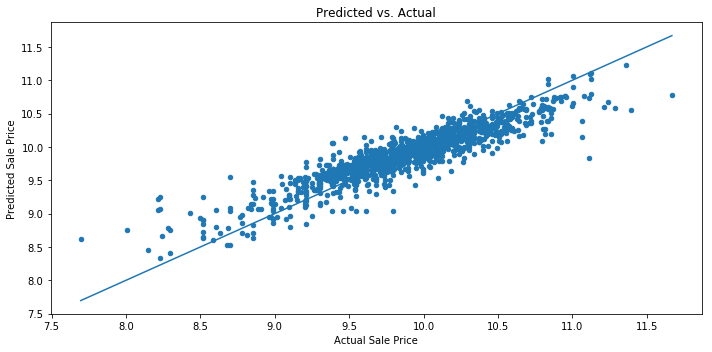

In [29]:
clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [31]:
print("most 30 company ",company_list)
company = str(input("company: "))
subname = str(input("subname: "))
year = int(input("year: "))
mile = int(input("mile: "))

('most 30 company ', [u'Ford', u'Chevrolet', u'Toyota', u'Nissan', u'Jeep', u'Honda', u'BMW', u'Mercedes-Benz', u'GMC', u'Lexus', u'Hyundai', u'Dodge', u'RAM', u'Kia', u'Cadillac', u'Volkswagen', u'Audi', u'Mazda', u'Buick', u'Subaru', u'INFINITI', u'Chrysler', u'MINI', u'Lincoln', u'Acura', u'Land', u'Porsche', u'Mitsubishi', u'Volvo', u'Jaguar'])
company: Ford


NameError: name 'Ford' is not defined

In [33]:
company = 'Honda'
subname = 'civic'
year = 2017
mile = 2000

In [34]:
target = pd.DataFrame(columns = [X_train1.columns])

In [35]:
cdx = 0
for col in X_train.columns:
    if col == 'company'+"_"+company:
        break;
    cdx += 1
cdx

12

In [36]:
sdx = 0
for col in X_train.columns:
    if col == 'subname'+"_"+subname:
        break;
    sdx += 1
sdx

390

In [37]:
target_list = np.zeros_like(X_train.loc[0])

target_list[cdx] = 1
target_list[sdx] = 1
target_list[0] = year
target_list[1] = mile

IndexError: index 390 is out of bounds for axis 0 with size 390

In [38]:
for i in range(1):
    target.loc[i] = target_list

In [39]:
target

,year,mile,company_Acura,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,...,subname_XT5,subname_XTS,subname_XV,subname_Xterra,subname_Yaris,subname_Yukon,subname_Z4,subname_allroad,subname_i-MiEV,subname_i3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
numerical_features = ['year', 'mile']
target[numerical_features] = np.log1p(target[numerical_features])

In [41]:
target

,year,mile,company_Acura,company_Audi,company_BMW,company_Buick,company_Cadillac,company_Chevrolet,company_Chrysler,company_Dodge,...,subname_XT5,subname_XTS,subname_XV,subname_Xterra,subname_Yaris,subname_Yukon,subname_Z4,subname_allroad,subname_i-MiEV,subname_i3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
price_log = clf.predict(target)

In [43]:
price_log

array([9.684714], dtype=float32)

In [44]:
price = np.exp(price_log)
int(price)

16070